<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Principle_Component_Analysis(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a powerful statistical technique used for dimensionality reduction. It transforms a high-dimensional dataset into a lower-dimensional one while retaining most of the important information.

**What is Dimensionality Reduction?**
Imagine you have a dataset with many features (columns). Some of these features might be redundant, highly correlated, or simply not contribute much to the overall understanding of the data. Dimensionality reduction aims to reduce the number of features, making the data easier to visualize, analyze, and process by machine learning algorithms.

**The Core Idea of PCA:**
PCA works by identifying the directions (called principal components) along which the data varies the most. These principal components are new, uncorrelated variables that are linear combinations of the original features.

Here's how it generally works:

1.  **Standardization:** PCA is affected by scale, so it's good practice to standardize your data (mean=0, variance=1) before applying PCA. This ensures that features with larger values don't dominate the analysis.

2.  **Covariance Matrix Calculation:** PCA computes the covariance matrix of the original features. The covariance matrix shows how much each pair of features varies together.

3.  **Eigenvalues and Eigenvectors:** The next step is to calculate the eigenvalues and eigenvectors from the covariance matrix.
    *   **Eigenvectors** represent the directions (principal components) of maximum variance in the data. They are essentially the new axes of your transformed feature space.
    *   **Eigenvalues** represent the magnitude of variance along each eigenvector. A larger eigenvalue indicates that more variance is captured along its corresponding eigenvector.

4.  **Selecting Principal Components:** The principal components are ordered by their corresponding eigenvalues, from largest to smallest. The first principal component captures the most variance, the second captures the second most, and so on. You then select a subset of these principal components (e.g., the top K components) that capture a sufficient amount of the total variance (e.g., 95%).

5.  **Projection:** Finally, the original data is projected onto the selected principal components, resulting in a new, lower-dimensional dataset.

**Why use PCA?**

*   **Dimensionality Reduction:** Reduces the number of features, which can speed up training of machine learning models and help with the 'curse of dimensionality'.
*   **Data Visualization:** Makes it possible to visualize high-dimensional data in 2D or 3D.
*   **Noise Reduction:** By focusing on the components that capture the most variance, PCA can effectively filter out noise.
*   **Feature Extraction:** Creates new, uncorrelated features that can sometimes be more interpretable or useful for modeling than the original features.

**Limitations:**

*   **Linearity:** PCA is a linear transformation, meaning it might not perform well if the relationships between features are non-linear.
*   **Interpretation:** The new principal components are linear combinations of original features, which can sometimes make them harder to interpret than the original features.
*   **Scale Sensitivity:** As mentioned, it's sensitive to the scaling of variables, necessitating standardization.

### What PCA Does

Principal Component Analysis (PCA) primarily performs **dimensionality reduction**. It reduces the number of features in your dataset while trying to retain as much important information as possible. It achieves this by transforming the data into a new set of uncorrelated variables called principal components, which are ordered by the amount of variance they capture.

#🔹 Program 1: PCA on Simple Dataset (Basic)

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample data
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2, 1.6],
    [1, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])

# Standardization
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

print("Original Shape:", X.shape)
print("Reduced Shape:", X_pca.shape)


Original Shape: (10, 2)
Reduced Shape: (10, 1)


#🔹 Program 2: Explained Variance Visualization

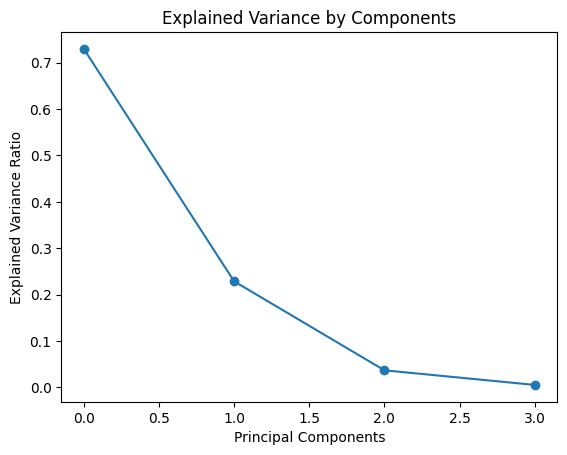

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load data
X, y = load_iris(return_X_y=True)

# Scale
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA()
pca.fit(X_scaled)

# Plot explained variance
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Components")
plt.show()


#🔹 Program 3: PCA for 2D Visualization (Iris Dataset)

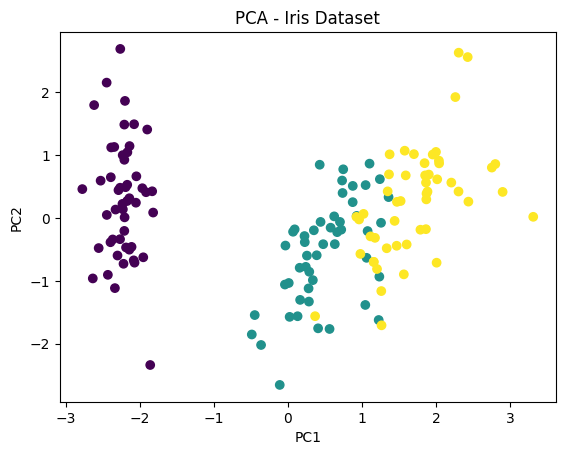

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - Iris Dataset")
plt.show()


#🔹 Program 4: PCA with Machine Learning Model

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Model
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Prediction
y_pred = model.predict(X_test_pca)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8666666666666667


In [5]:
import numpy as np

# Sample data
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0]
])

# Step 1: Mean centering
X_meaned = X - np.mean(X, axis=0)

# Step 2: Covariance matrix
cov_matrix = np.cov(X_meaned, rowvar=False)

# Step 3: Eigen values and vectors
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvectors = eigen_vectors[:, sorted_index]

# Step 5: Reduce to 1 dimension
W = sorted_eigenvectors[:, 0].reshape(2,1)

# Step 6: Transform data
X_reduced = np.dot(X_meaned, W)

print(X_reduced)


[[ 0.44362444]
 [-2.17719404]
 [ 0.57071239]
 [-0.12902465]
 [ 1.29188186]]


In [6]:
import pandas as pd

# Create dataset
data = {
    "Rooms": [1, 2, 3, 4, 5, 3, 2, 4, 5, 1],
    "Grocery_Shops": [2, 3, 5, 6, 7, 5, 3, 6, 8, 2],
    "Price": [25, 40, 65, 80, 100, 70, 45, 85, 110, 30],
    "Area": [500, 800, 1200, 1600, 2000, 1300, 850, 1700, 2200, 550],
    "Dance_Clubs": [1, 1, 2, 3, 4, 2, 1, 3, 4, 1]
}

df = pd.DataFrame(data)
df


,Rooms,Grocery_Shops,Price,Area,Dance_Clubs
0,1,2,25,500,1
1,2,3,40,800,1
2,3,5,65,1200,2
3,4,6,80,1600,3
4,5,7,100,2000,4
5,3,5,70,1300,2
6,2,3,45,850,1
7,4,6,85,1700,3
8,5,8,110,2200,4
9,1,2,30,550,1


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Shape after PCA:", X_pca.shape)


Shape after PCA: (10, 2)


In [9]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Captured:", sum(pca.explained_variance_ratio_))


Explained Variance Ratio: [0.98761864 0.00844111]
Total Variance Captured: 0.9960597500060823


In [10]:
pca_df = pd.DataFrame(
    X_pca,
    columns=["PC1", "PC2"]
)

pca_df


,PC1,PC2
0,-2.948002,0.305301
1,-1.927993,-0.185055
2,-0.064348,-0.187534
3,1.414473,0.064251
4,2.973878,0.266845
5,0.095601,-0.252043
6,-1.807726,-0.241904
7,1.574422,-0.000258
8,3.517432,-0.018056
9,-2.827735,0.248452


In [11]:
loading_scores = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=df.columns
)

loading_scores


,PC1,PC2
Rooms,0.447607,-0.199329
Grocery_Shops,0.447869,-0.312156
Price,0.448677,-0.273877
Area,0.449375,-0.086739
Dance_Clubs,0.442508,0.883343


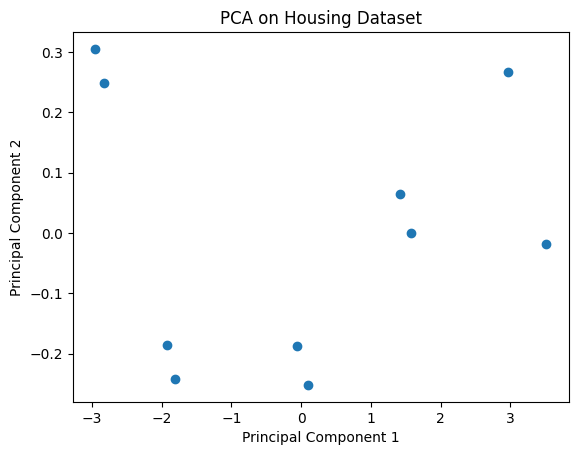

In [12]:
import matplotlib.pyplot as plt

plt.scatter(pca_df["PC1"], pca_df["PC2"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Housing Dataset")
plt.show()


In [13]:
loading_scores.loc["Rooms"]


,Rooms
PC1,0.447607
PC2,-0.199329


### Step-by-Step Explanation of PCA on Housing Dataset

Let's break down the PCA applied to the housing dataset created earlier.

**Step 1: Creating the Dataset (`m1Ao6_Qlz1hJ`)**

First, a Pandas DataFrame named `df` is created. This DataFrame contains data for various house-related features such as 'Rooms', 'Grocery_Shops', 'Price', 'Area', and 'Dance_Clubs'. This serves as our original, high-dimensional dataset.

**Step 2: Scaling the Data (`gqyr18ir0MbL`)**

PCA is sensitive to the scale of the features. To prevent features with larger values from dominating the analysis, the `StandardScaler` from scikit-learn is used. This transforms the data so that each feature has a mean of 0 and a standard deviation of 1. The scaled data is stored in `X_scaled`.

**Step 3: Applying PCA (`zK9-WhSK0O6F`)**

Next, Principal Component Analysis is applied to the scaled data. We initialize `PCA(n_components=2)`, which means we want to reduce the dimensionality of our data to 2 principal components. The `fit_transform` method then calculates these components and projects the `X_scaled` data onto this new 2-dimensional space, storing the result in `X_pca`.

**Step 4: Examining Explained Variance (`aGR_39950Qns`)**

After running PCA, it's crucial to understand how much variance each principal component captures. `pca.explained_variance_ratio_` shows the proportion of the total variance explained by each selected component. The sum of these ratios indicates the total percentage of variance retained by the chosen number of components (in this case, 2).

**Step 5: Creating a PCA DataFrame (`WJ-z9lwE0Ss_`)**

The `X_pca` array, which contains the data projected onto the principal components, is then converted into a new Pandas DataFrame called `pca_df`. The columns are named 'PC1' and 'PC2' for clarity, representing the first and second principal components, respectively.

**Step 6: Analyzing Loading Scores (`ehWoP8tR0UfD` and `Zo0mLzSu0cQ-`)**

Loading scores tell us how much each original feature contributes to each principal component. `pca.components_` provides these values. We create a DataFrame `loading_scores` to visualize these contributions, with original features as rows and principal components as columns. For example, `loading_scores.loc["Rooms"]` specifically shows the contribution of the 'Rooms' feature to 'PC1' and 'PC2'. These scores help interpret what each principal component represents in terms of the original features.

**Step 7: Visualizing PCA Results (`G2JHLcLZ0Wtj`)**

Finally, a scatter plot is generated using `matplotlib.pyplot`. This plot visualizes the data points in the new 2-dimensional space defined by PC1 and PC2. Each point on the scatter plot represents an original data entry, and its position is determined by its values for Principal Component 1 and Principal Component 2. This helps in understanding the underlying structure or clusters in the data that might not have been visible in the original high-dimensional space.

#Another Way

Final Dataset:

   Rooms  Grocery_Shops  Price  Area  Dance_Clubs  Area_per_Room  \
0      1              2     25   500            1     500.000000   
1      2              3     40   800            1     400.000000   
2      3              5     65  1200            2     400.000000   
3      4              6     80  1600            3     400.000000   
4      5              7    100  2000            4     400.000000   
5      3              5     70  1300            2     433.333333   
6      2              3     45   850            1     425.000000   
7      4              6     85  1700            3     425.000000   
8      5              8    110  2200            4     440.000000   
9      1              2     30   550            1     550.000000   

   Price_per_sqft  Wash_Rooms  
0        0.050000           1  
1        0.050000           1  
2        0.054167           2  
3        0.050000           2  
4        0.050000           3  
5        0.053846           2  
6        0.

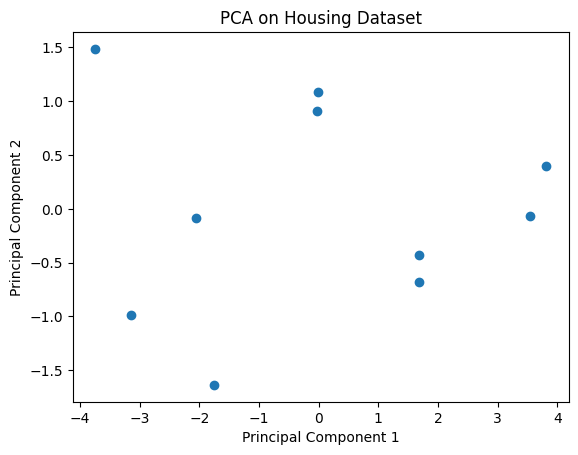

In [14]:
# ================================
# 1️⃣ Import Libraries
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ================================
# 2️⃣ Create Dataset
# ================================
data = {
    "Rooms": [1, 2, 3, 4, 5, 3, 2, 4, 5, 1],
    "Grocery_Shops": [2, 3, 5, 6, 7, 5, 3, 6, 8, 2],
    "Price": [25, 40, 65, 80, 100, 70, 45, 85, 110, 30],   # in lakhs
    "Area": [500, 800, 1200, 1600, 2000, 1300, 850, 1700, 2200, 550],
    "Dance_Clubs": [1, 1, 2, 3, 4, 2, 1, 3, 4, 1]
}

df = pd.DataFrame(data)

# ================================
# 3️⃣ Feature Correction / Engineering
# ================================
df["Area_per_Room"] = df["Area"] / df["Rooms"]
df["Price_per_sqft"] = df["Price"] / df["Area"]

# Add Wash_Rooms column
def add_washrooms(rooms):
    if rooms <= 2:
        return 1
    elif rooms <= 4:
        return 2
    else:
        return 3

df["Wash_Rooms"] = df["Rooms"].apply(add_washrooms)

print("Final Dataset:\n")
print(df)

# ================================
# 4️⃣ Standardize the Data
# ================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# ================================
# 5️⃣ Apply PCA
# ================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)
print("Total Variance Captured:", sum(pca.explained_variance_ratio_))

# ================================
# 6️⃣ PCA Loadings (Feature Importance)
# ================================
loading_scores = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=df.columns
)

print("\nPCA Feature Loadings:\n")
print(loading_scores)

# ================================
# 7️⃣ PCA Result DataFrame
# ================================
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
print("\nPCA Transformed Data:\n")
print(pca_df)

# ================================
# 8️⃣ Visualization
# ================================
plt.scatter(pca_df["PC1"], pca_df["PC2"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Housing Dataset")
plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [17]:
# Expanded dataset
data = {
    "Rooms": [1,2,3,4,5,3,2,4,5,1,
              2,3,4,5,6,3,4,2,6,1],

    "Grocery_Shops": [2,3,5,6,7,5,3,6,8,2,
                      3,5,6,8,9,5,6,3,9,2],

    "Price": [25,40,65,80,100,70,45,85,110,30,
              50,68,82,105,130,72,88,48,135,28],

    "Area": [500,800,1200,1600,2000,1300,850,1700,2200,550,
             900,1250,1650,2100,2600,1350,1750,820,2700,520],

    "Dance_Clubs": [1,1,2,3,4,2,1,3,4,1,
                     1,2,3,4,5,2,3,1,5,1]
}

df = pd.DataFrame(data)
df.head()


,Rooms,Grocery_Shops,Price,Area,Dance_Clubs
0,1,2,25,500,1
1,2,3,40,800,1
2,3,5,65,1200,2
3,4,6,80,1600,3
4,5,7,100,2000,4


In [18]:
# Feature correction
df["Area_per_Room"] = df["Area"] / df["Rooms"]
df["Price_per_sqft"] = df["Price"] / df["Area"]

# Add Wash_Rooms
def add_washrooms(rooms):
    if rooms <= 2:
        return 1
    elif rooms <= 4:
        return 2
    elif rooms <= 5:
        return 3
    else:
        return 4

df["Wash_Rooms"] = df["Rooms"].apply(add_washrooms)

df.head()


,Rooms,Grocery_Shops,Price,Area,Dance_Clubs,Area_per_Room,Price_per_sqft,Wash_Rooms
0,1,2,25,500,1,500.0,0.050000,1
1,2,3,40,800,1,400.0,0.050000,1
2,3,5,65,1200,2,400.0,0.054167,2
3,4,6,80,1600,3,400.0,0.050000,2
4,5,7,100,2000,4,400.0,0.050000,3


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Captured:", pca.explained_variance_ratio_.sum())


Explained Variance Ratio: [0.80761617 0.10920448]
Total Variance Captured: 0.9168206508964857


In [21]:
loading_scores = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=df.columns
)

loading_scores


,PC1,PC2
Rooms,0.391826,-0.060753
Grocery_Shops,0.390824,-0.018121
Price,0.388509,-0.007899
Area,0.390749,0.028517
Dance_Clubs,0.387970,0.139357
Area_per_Room,-0.179949,0.918959
Price_per_sqft,-0.253170,-0.338972
Wash_Rooms,0.378297,0.127663


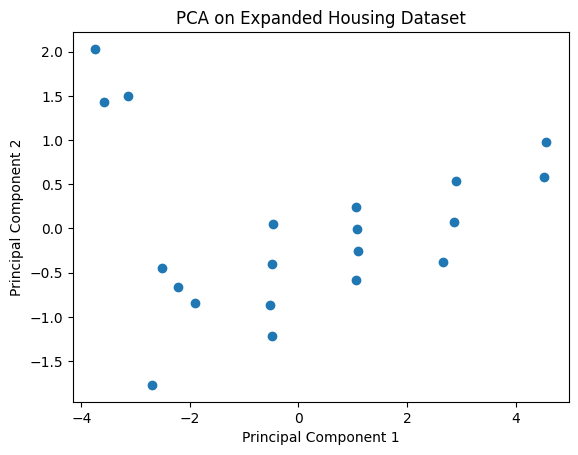

In [22]:
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

plt.scatter(pca_df["PC1"], pca_df["PC2"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Expanded Housing Dataset")
plt.show()


#1️⃣ METHOD 1: Correlation Heatmap (Relationship Check)

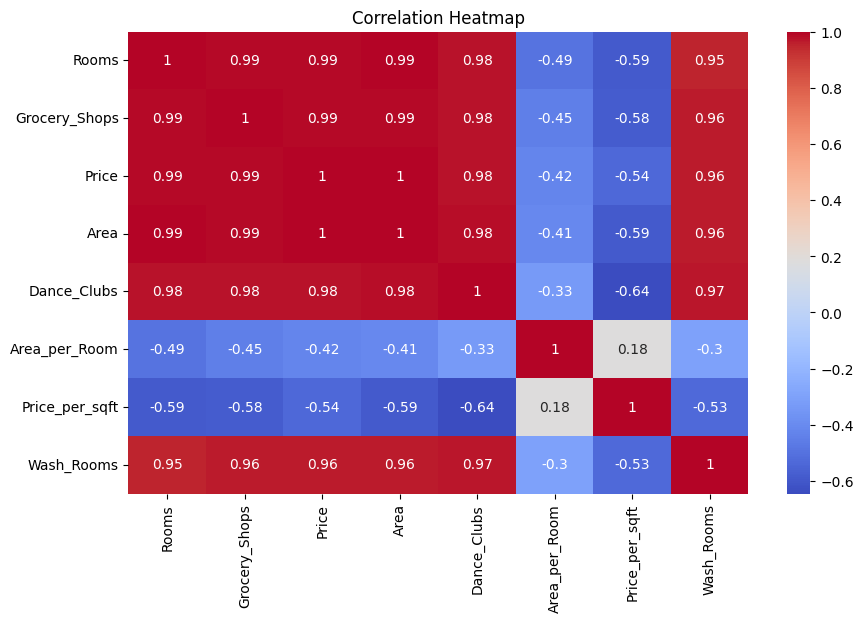

In [23]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.80761617 0.10920448]


In [27]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=df.columns
)

loadings


,PC1,PC2
Rooms,0.391826,-0.060753
Grocery_Shops,0.390824,-0.018121
Price,0.388509,-0.007899
Area,0.390749,0.028517
Dance_Clubs,0.387970,0.139357
Area_per_Room,-0.179949,0.918959
Price_per_sqft,-0.253170,-0.338972
Wash_Rooms,0.378297,0.127663


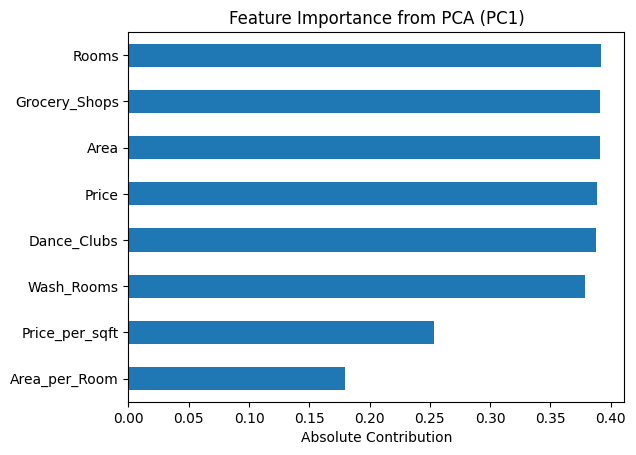

In [28]:
loadings["PC1"].abs().sort_values().plot(kind="barh")
plt.title("Feature Importance from PCA (PC1)")
plt.xlabel("Absolute Contribution")
plt.show()
